In [1]:
# Import required Libraries
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import requests
from scipy.stats import linregress
import json

# Import API keys
from config import geoapify_key
from config import weather_api_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load HME projects weather info into a Dataframe
projects_weather_data_df = pd.read_csv(r"C:\Users\Owner\python\project-1\projects_weather_data.csv")

# Display sample data
projects_weather_data_df.head()

,Project-Number,Name,Address,Lat,Lng,Weather_Category,Color,Temperature_F,Windspeed_mph
0,18-054,PAR 1244,"5950 York St, Denver, CO 80216, USA",39.805279,-104.958759,Cold but Good Weather,Blue,28,6
1,18-121,SECURITY SANITATION WWTF IMPROVEMENTS,"6510 Southmoor Dr, Fountain, CO 80817, USA",38.736055,-104.737949,Snow,Red,30,7
2,18-145,WESTERN CURRENCY FACILITY EXPANSION,"8776 Blue Mound Rd, Fort Worth, TX 76131, USA",32.894373,-97.348633,Rain,Red,52,8
3,18-147,BID PACKAGE 4.3 - LEONARD WTP YARD PIPE,"361 Co Rd 4965, Leonard, TX 75452, USA",33.383391,-96.282564,Good Weather,Green,48,9
4,19-040,SADDLE CREEK RTB,"2520 S 64th St, Omaha, NE 68106, USA",41.240430,-96.011843,Cold but Good Weather,Blue,31,8


In [3]:
# Use hvplot.points to create a colorized map

weather_map = projects_weather_data_df.hvplot.points(
    'Lng', 'Lat',
    geo=True, tiles='OSM', height=500, width=700,
    size=55,  # Adjust the size of the points
    line_color='black',
    line_width=0.75,
    color='Color',  # Set the color of the points
    title='Projects Weather Map',
    hover_cols=['Project-Number', 'Weather_Category', 'Temperature_F', 'Windspeed_mph'],
    legend='bottom_right',  # Show legend in the bottom-right corner
    
)

# Display the map
weather_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Color,Project-Number,Weather_Category,Temperature_F,Windspeed_mph)

Map explination:

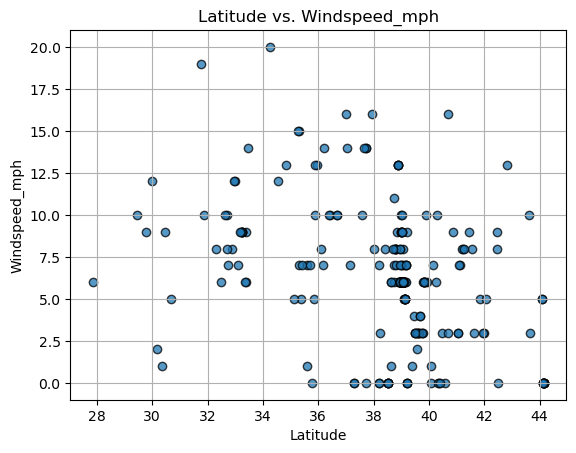

In [4]:
#create scatter plot for Latitude vs Wind

plt.scatter(projects_weather_data_df["Lat"], projects_weather_data_df["Windspeed_mph"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Windspeed_mph")
plt.xlabel("Latitude")
plt.ylabel("Windspeed_mph")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs Windspeed Summary: 
a] There is a negative correlation between the latitude and Windspeed according to the scatter graph.
b] There is a weak relationship between the latitude and Windspeed. This is shown by the weak clustering of data-points in the graph.
c]Its also noted that there are few projects bellow 32degrees latitude and above 42 degrees latitude.
d]Most of the projects are located between 34 to 42 degrees latitude
e]Having acknowledged that work/productivity can only stop at a windspeed of 25mph no project station was affected as a result of windspeed,
f]High windspeed values of more than 15mph were recorded in projects located between 31 - 41 degrees latitude. So that means that there is a likelihood of one of those projects being affected in future by windspeed.

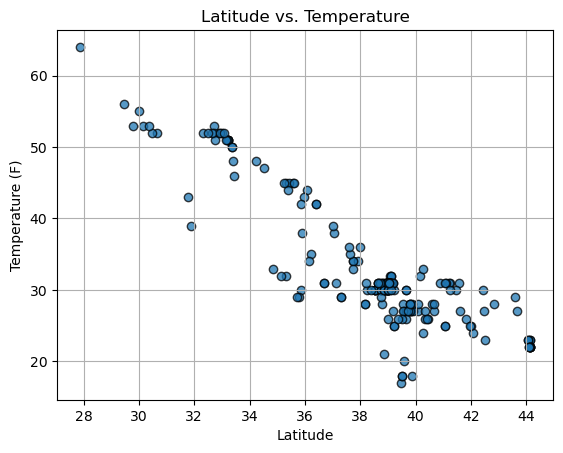

In [5]:
#create scatter plot for Latitude vs Temp
plt.scatter(projects_weather_data_df["Lat"], projects_weather_data_df["Temperature_F"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs Temperature Summary:
a]There is a negative correlation between latitude and Windspeed according to the scatter graph.
b] There is a stronger relationship between the latitude and temperature. This is shown by the tight clustering of data-points in the graph.
b]Having acknowledged that work/productivity can only stop at a windspeed of 25mph no project station was affected as a result of windspeed, High windspeed values of more than 15mph were recorded in projects located between 31 - 41 degrees latitude. So that means that there is a likelihood of one of those projects being affected in future by windspeed.

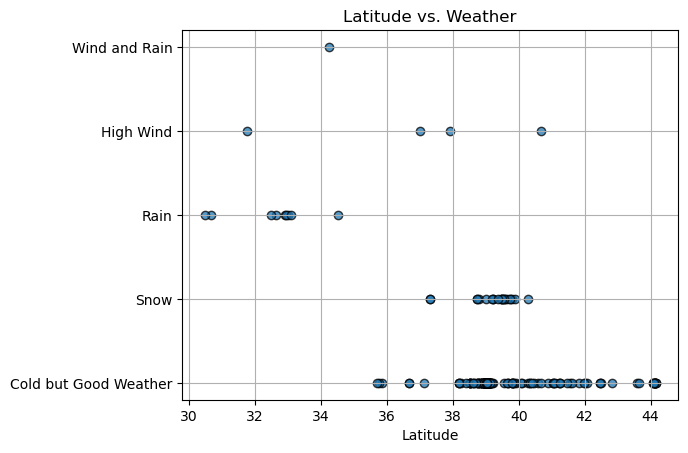

In [6]:
#create scatter plot for all weather days

# Filter out rows with 'Good Weather' in the 'Weather_Category' column
filtered_df = projects_weather_data_df[projects_weather_data_df['Weather_Category'] != 'Good Weather']

# Create a scatter plot for Weather Category vs Lat
plt.scatter(filtered_df["Lat"], filtered_df["Weather_Category"], edgecolors="black", alpha=0.75)

plt.title("Latitude vs. Weather")
plt.xlabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

Latitude vs Weather Categories Summary:

a] All projects between 30 to 35 degrees latitude had no snow and they were the only stations that recorded rainfall.
b] The highest %tage concertration of good weather was recorded in stations located between 38 to 42 degrees latitude. It also recorded the highest %tage of projects that experienced a snow related weather.
c]All projects located between 41 to 44 degrees latitude had cold but good weather, no snow,rain or high wind recorded.
d]Both high wind and rain was only recorded between 30 - 35degrees latitude.


In [7]:
# Create bar chart for weather_category
bar_chart = projects_weather_data_df['Weather_Category'].value_counts().hvplot.bar(
    height=400,
    width=800,
    title='Weather Category Distribution',
    xlabel='Weather Category',
    ylabel='Count',
    rot=45
)

# Show the plot
bar_chart

:Bars   [Weather_Category]   (count)

Weather Category Summary:
a] 148 stations recorded cold but good weather.
b] 49 stations recorded good weather.
c] 23 stations recorded snow weather.
d] 4 stations recorded high wind
e] 1 station recorded both wind and rain.

In [8]:
# List the total number of projects with rain/snow and/or wind over 15mph

bad_weather_filtered_df = projects_weather_data_df[projects_weather_data_df['Weather_Category'] != 'Good Weather']

total_projects = len(bad_weather_filtered_df)
print(f"Total number of projects with rain/snow and/or wind over 15 mph is: {total_projects}")

bad_weather_filtered_df.head()

Total number of projects with rain/snow and/or wind over 15 mph is: 185


,Project-Number,Name,Address,Lat,Lng,Weather_Category,Color,Temperature_F,Windspeed_mph
0,18-054,PAR 1244,"5950 York St, Denver, CO 80216, USA",39.805279,-104.958759,Cold but Good Weather,Blue,28,6
1,18-121,SECURITY SANITATION WWTF IMPROVEMENTS,"6510 Southmoor Dr, Fountain, CO 80817, USA",38.736055,-104.737949,Snow,Red,30,7
2,18-145,WESTERN CURRENCY FACILITY EXPANSION,"8776 Blue Mound Rd, Fort Worth, TX 76131, USA",32.894373,-97.348633,Rain,Red,52,8
4,19-040,SADDLE CREEK RTB,"2520 S 64th St, Omaha, NE 68106, USA",41.240430,-96.011843,Cold but Good Weather,Blue,31,8
5,19-048,MARCY GULCH WWTP,"8700 US-85, Highlands Ranch, CO 80126, USA",39.556900,-105.033535,Cold but Good Weather,Blue,28,3


In [9]:
# Load HME projects weather info into a Dataframe
Weather_5Day_Forecast_df = pd.read_csv(r"C:\Users\Owner\python\project-1\Weather_5Day_Forecast.csv")

# Display sample data
Weather_5Day_Forecast_df.head()

,Project-Number,Name,Lat,Lng,Weather_Date,Weather_Type
0,18-054,PAR 1244,39.805279,-104.958759,1/5/2024 6:00,good weather
1,18-054,PAR 1244,39.805279,-104.958759,1/5/2024 9:00,good weather
2,18-054,PAR 1244,39.805279,-104.958759,1/5/2024 12:00,good weather
3,18-054,PAR 1244,39.805279,-104.958759,1/5/2024 15:00,good weather
4,18-054,PAR 1244,39.805279,-104.958759,1/5/2024 18:00,good weather


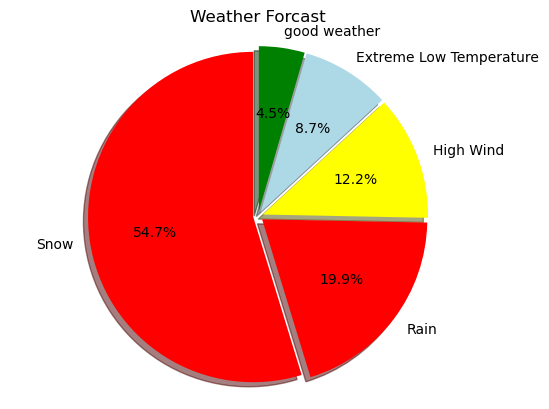

In [10]:
# Create pie chart for forecasted weather
    # if rain and/or snow color red, if high wind color yellow, if rain/snow/wind color red,
    #else if good weather color green

Weather = ['Snow', 'Rain', 'High Wind', 'Extreme Low Temperature', 'good weather']
weather_type_counts = Weather_5Day_Forecast_df['Weather_Type'].value_counts().reset_index()
weather_type_counts.columns = ['Weather_Type', 'Count']
colors = ['red', 'red', 'yellow', 'lightblue', 'green']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)

plt.title ('Weather Forcast')

plt.pie(weather_type_counts['Count'], labels=Weather, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode, shadow=True)

plt.axis('equal')

plt.show()

Weather Forcast Summary:

The r-squared is:0.1490845864267009


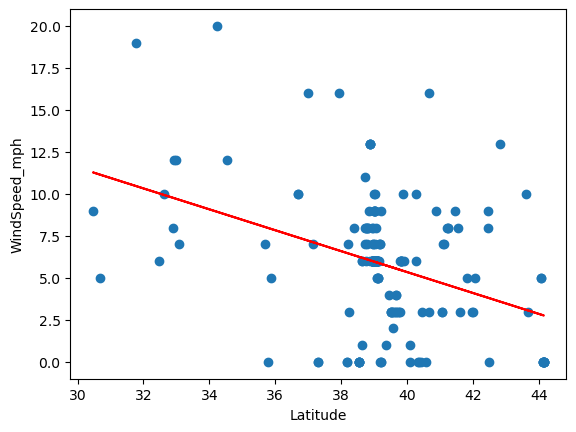

In [11]:
#creating a line of best fit for the scatter graph between Latitude vs Windspeed

x_values = bad_weather_filtered_df['Lat']
y_values = bad_weather_filtered_df['Windspeed_mph']
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + " +str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed_mph')
print(f"The r-squared is:{rvalue**2}")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs Windspeed Summary: 
a] There is a negative correlation between the two data-sets. Even though due to weak clustering of data-points the realationship is weak.
b] r-squared being 0.149 means that 15% of the target variance can be explained by the datasets.


The r-squared is:0.6502278682885868


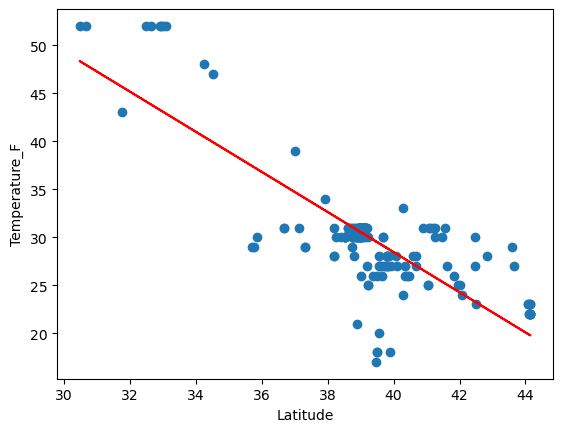

In [12]:
x_values = bad_weather_filtered_df['Lat']
y_values = bad_weather_filtered_df['Temperature_F']
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + " +str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature_F')
print(f"The r-squared is:{rvalue**2}")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs Windspeed Summary: 
a] There is a negative correlation between the two data-sets. 
Of note; There is a strong relationship of the two datasets between 38 to 42 degrees latitude and weak relationship bellow 38 degrees latitude.
b] r-squared being 0.650 means that 65% of the target variance can be explained by the datasets.

In [13]:
Weather_5Day_Forecast_df.dtypes


Project-Number     object
Name               object
Lat               float64
Lng               float64
Weather_Date       object
Weather_Type       object
dtype: object

In [14]:
Weather_5Day_Forecast_df.describe()

,Lat,Lng
count,5850.000000,5850.000000
mean,38.303905,-97.718142
std,3.064953,5.171816
min,27.855665,-111.736711
25%,37.307563,-100.719870
50%,39.014068,-96.461875
75%,39.651460,-95.220061
max,44.152153,-76.447096


In [15]:

Weather_5Day_Forecast_df.index

RangeIndex(start=0, stop=5850, step=1)

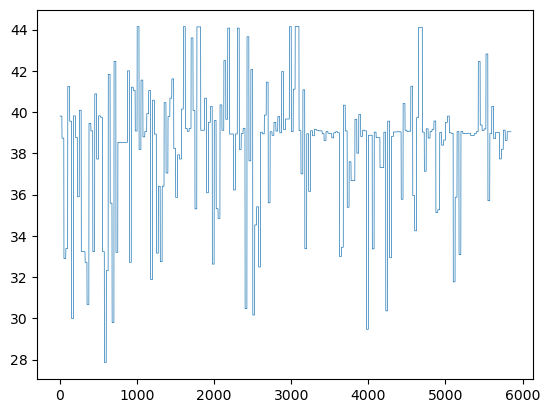

In [16]:
#df2.index = pd.to_datetime(df1.index)
#Time-based indexing/Time-series


#sns.set(rc={'figure.figsize':(11, 4)})
Weather_5Day_Forecast_df['Lat'].plot(linewidth=0.5);